In [5]:
from estnltk.text import Text
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("../data/postimees.txt", sep="\t", names=['website', 'id', 'datetime', 'title', 'share_count', 'comment_count', 'read_count', 'author', 'section', 'content'])
data = data.drop_duplicates(subset=['id'])
data = data.drop(columns=['website', 'section'])
data.head()

,id,datetime,title,share_count,comment_count,read_count,author,content
0,6839008,2019-11-30T13:50:49+02:00,Tänavatantsijad tõid Leedu võistluselt Tartuss...,0.0,0,14,{'Lenel Karu'},Lithuanian Cup ehk Baltimaade üks suurimaid ta...
1,6838978,2019-11-30T12:49:30+02:00,Tartu ärinõuandla andis välja Hea Tegu auhinnad,0.0,0,22,{'Tartu Postimees'},Tartu ärinõuandla tunnustas konkursil Hea Tegu...
2,6838938,2019-11-30T11:08:41+02:00,Jalgrattur pööras sõiduautole ette ja sai viga,0.0,0,60,{'Tartu Postimees'},Eile kell 12.51 toimus liiklusõnnetus Tartumaa...
3,6838937,2019-11-30T11:04:54+02:00,Vales kohas vasakpööret sooritanud autojuht põ...,1.0,0,121,{'Tartu Postimees'},Eile kell 11.27 toimus liiklusõnnetus Tartus T...
4,6838618,2019-11-29T19:04:38+02:00,Galerii: Toomas Asser sai ülikooli muuseumi pü...,73.0,0,1425,{'Tartu Postimees'},Tartu ülikooli muuseumis Toomemäel avati täna ...


In [8]:
print("Number of articles: " + str(data.shape[0]))

Number of articles: 214021


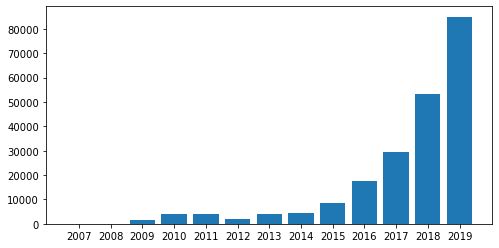

In [218]:
years = {}
for i in range(2007, 2020):
    years[i] =  data[data['datetime'].str.match(str(i) + "-*")].shape[0]
plt.figure(figsize=[8,4])
plt.bar(years.keys(), years.values())
plt.xticks(ticks=range(2007,2020))
plt.show()

yearsl = []
values = []

for i in years.keys():
    yearsl.append(i)
    
for i in years.values():
    values.append(i)
    
pd.DataFrame({'years': yearsl, 'amount': values}).to_csv('years.csv', sep='\t')

In [10]:
pd.set_option('display.max_rows', 8000)
data.author.value_counts().head(20)

{'BNS'}                      7272
{'Postimees Sport'}          6466
{'Elu24.ee'}                 5407
{'Kodustiil.ee'}             4980
{'Reporter.ee'}              4933
{'Tartu Postimees'}          4117
{'Aivar Pau'}                3933
{'Kultuuritoimetus'}         3910
{'Inna-Katrin Hein'}         3439
{'Kuido Saarpuu'}            3348
{'Sõbranna'}                 3285
{'Põhjarannik'}              3226
{'Kelli Põlendik'}           3142
{'Johanna Vahuri'}           2829
{'Lõuna-Eesti Postimees'}    2688
{'SH'}                       2667
{'Maiken Mägi'}              2511
{'Majandus24'}               2431
{'PM'}                       2416
{'AFP / BNS'}                2261
Name: author, dtype: int64

Most shared articles

In [11]:
pd.set_option('display.max_colwidth', 100)
wo_content_data = data.drop(columns=['content', 'id'])
wo_content_data.sort_values(by=["share_count"], ascending=False).head(5)

,datetime,title,share_count,comment_count,read_count,author
218985,2019-05-01T14:45:00+03:00,Igor Gräzin «matsiplikast» president Kaljulaidist: Kersti vaimne tase ei ületa vene lüpsja-karja...,12325.0,74,85096,{'Elu24.ee'}
69682,2019-05-15T08:17:06+03:00,Keskkonnaamet kutsub inimesi tungivalt üles muruniitmise ja rohimisega tagasi tõmbama,11480.0,4,65845,{'Anna-Liisa Mets'}
80466,2019-07-04T19:21:28+03:00,Video: tantsupeo peaproov kiirvaates,9238.0,0,27348,{'Eero Vabamägi'}
65257,2019-07-04T19:35:46+03:00,Õnnestus: väikese Annabeli geeniravi sai tehtud ja läks hästi,9135.0,2,23556,{'PM Tervis'}
71532,2019-02-24T09:14:04+02:00,Galerii: vaata kui kaunilt on loomariigis esindatud Eesti lipuvärvid,8836.0,2,36961,{'Kelli Põlendik'}


Articles with most comments

In [12]:
wo_content_data.sort_values(by=["comment_count"], ascending=False).head(5)

,datetime,title,share_count,comment_count,read_count,author
27783,2019-03-05T11:55:14+02:00,Otseblogi: Jüri Ratas kutsus EKRE poliitikud korrale,172.0,1158,1030334,{'Postimees'}
12682,2019-07-19T13:19:53+03:00,Kaljulaid: vihkan EKRE poliitikute käitumist ja palun selle pärast vabandust,1629.0,401,82258,{'Postimees/BNS'}
71717,2018-11-16T12:16:29+02:00,"BLOGI, FOTOD JA VIDEOD Valitsuskriisi kuues päev: president kutsus valitsuse umbusaldust kaaluva...",24.0,399,162950,{'Postimees'}
25350,2019-03-25T10:36:07+02:00,"Mart ja Martin Helme ähvardavad: kui läbirääkimised tuksi keeratakse, tuleb plahvatus",4128.0,315,95993,{'Vilja Kiisler'}
9884,2019-08-19T20:13:36+03:00,President Kaljulaid: Martin Helmel ei peaks olema kohta valitsuses,1769.0,308,57195,{'Postimees'}


Articles with most reads.

In [13]:
wo_content_data.sort_values(by=["read_count"], ascending=False).head(5)

,datetime,title,share_count,comment_count,read_count,author
27783,2019-03-05T11:55:14+02:00,Otseblogi: Jüri Ratas kutsus EKRE poliitikud korrale,172.0,1158,1030334,{'Postimees'}
130161,2019-03-07T15:00:00+02:00,"Dopingublogi: Kärp tunnistas üles, et tarvitas dopingut koos Tammjärve ja Veerpaluga",0.0,150,829039,"{'Merili Luuk', 'Andres Vaher, Seefeld', 'Kris Ilves'}"
61112,2019-10-27T14:30:06+02:00,Blogi: tehtud - Ott Tänak ja Martin Järveoja on maailmameistrid!,79.0,59,624064,{'Postimees Sport'}
78287,2019-10-06T15:25:39+03:00,Blogi: maksimum! Tänak võitis Walesi ralli ja ka punktikatse,34.0,18,540057,{'Postimees Sport'}
193395,2019-06-16T14:27:20+03:00,Blogi: Ott Tänak langes Sardiinia MM-rallil viimase katsega esikohalt viiendaks,146.0,67,520482,{'Postimees Sport'}


Can get the number of paragraps, sentences and words, to see how much this influences the overal popularity of the article.

In [14]:
word_count = pd.read_csv("../../data/word_count.csv", sep=",", names=['word', 'amount'], encoding="utf-8")
word_count = word_count.sort_values(by="amount", ascending=False)
word_count.head(40)

,word,amount
12,",",3532380
22,.,3177809
25,olema,2267904
5,ja,1421754
63,see,927073
115,et,690298
50,tema,552076
125,ei,483552
47,kui,444605
140,mis,434697


In [15]:
title_word_count = pd.read_csv("../../data/title_word_count.csv", sep=",", names=['word', 'amount'], encoding="utf-8")
title_word_count = title_word_count.sort_values(by="amount", ascending=False)
pd.set_option('display.max_rows', 40)
title_word_count.head(40)

,word,amount
21,:,69470
95,olema,31097
1,",",30227
72,ja,24022
546,?,15304
5,Eesti,14151
73,saama,13202
164,ei,9652
727,mis,9510
65,uus,8455
